# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
df_seoul_business = pd.read_csv('C:/Users/User/Desktop/mini1/AIVLE/df_seoul_business.csv', encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('C:/Users/User/Desktop/mini1/AIVLE/df_seoul_moving.csv', encoding = 'UTF-8')
df_seoul_bus_station = pd.read_csv('C:/Users/User/Desktop/mini1/AIVLE/df_seoul_bus_station.csv', encoding = 'UTF-8')
df_seoul_people = pd.read_csv('C:/Users/User/Desktop/mini1/AIVLE/df_seoul_people.csv', encoding = 'UTF-8')

In [5]:
df_seoul_moving['도착 시군구 코드'] = standard['자치구']
df_seoul_moving.rename(columns = {'도착 시군구 코드':'자치구'}, inplace = True)
df_seoul_moving.head()

,Unnamed: 0,자치구,평균 이동 시간,평균 이동 인구,총 이동 시간,총 이동 인구
0,0,종로구,21.443330,41.486279,10239340,19809988.63
1,1,중구,21.166269,41.724896,10285410,20275545.43
2,2,용산구,21.553622,34.636181,9488120,15247193.24
3,3,성동구,21.950757,39.869241,9952210,18076235.50
4,4,광진구,22.779081,43.671869,9761770,18715186.44


In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
a = pd.merge(df_seoul_business,df_seoul_bus_station, how = 'inner', on = '자치구')
b = pd.merge(df_seoul_moving,df_seoul_people, how = 'inner', on = '자치구')
seoul_df = pd.merge(a,b, how = 'inner', on = '자치구')

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
seoul_df.drop(['Unnamed: 0_x'], axis = 1, inplace = True)
seoul_df.drop(['Unnamed: 0_y'], axis = 1, inplace = True)
seoul_df.head()

,자치구,택시운송업사업체수,커피전문점사업체수,한식 일반 음식점업사업체수,기타주점업사업체수,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,...,남자,여자,한국인합,한국인남자,한국인여자,외국인합,외국인남자,외국인여자,세대당인구,65세이상고령자
0,종로구,215,948,1548,537,349,114,5468935,5205394,131.889620,...,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
1,중구,230,869,1588,381,178,110,3776675,3598932,121.020124,...,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2,용산구,416,634,857,487,323,72,4189977,4086474,137.891694,...,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
3,성동구,1200,547,956,285,435,60,2807280,2746738,96.377369,...,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
4,광진구,1119,590,963,633,269,44,2749448,2753411,118.352546,...,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [75]:
seoul_df

,자치구,택시운송업사업체수,커피전문점사업체수,한식 일반 음식점업사업체수,기타주점업사업체수,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,...,남자,여자,한국인합,한국인남자,한국인여자,외국인합,외국인남자,외국인여자,세대당인구,65세이상고령자
0,종로구,215,948,1548,537,349,114,5468935,5205394,131.889620,...,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
1,중구,230,869,1588,381,178,110,3776675,3598932,121.020124,...,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2,용산구,416,634,857,487,323,72,4189977,4086474,137.891694,...,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
3,성동구,1200,547,956,285,435,60,2807280,2746738,96.377369,...,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
4,광진구,1119,590,963,633,269,44,2749448,2753411,118.352546,...,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604
5,동대문구,1546,494,1236,499,306,77,5240565,5115379,131.841430,...,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963
6,중랑구,3634,381,991,535,380,52,3792541,3740923,87.403863,...,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851
7,성북구,1835,457,973,512,602,103,6236424,6231238,123.251922,...,212277,230403,433150,208691,224459,9530,3586,5944,2.20,75719
8,강북구,1713,358,965,580,413,70,4825181,4671783,133.020373,...,145934,154890,297384,144643,152741,3440,1291,2149,2.05,64961
9,도봉구,2993,288,672,258,359,48,3304305,3211421,106.859356,...,154440,163660,316098,153716,162382,2002,724,1278,2.28,65122


In [76]:
seoul_df.corr()

,택시운송업사업체수,커피전문점사업체수,한식 일반 음식점업사업체수,기타주점업사업체수,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,...,남자,여자,한국인합,한국인남자,한국인여자,외국인합,외국인남자,외국인여자,세대당인구,65세이상고령자
택시운송업사업체수,1.000000,-0.332024,-0.264224,0.012685,0.254818,-0.609725,-0.219573,-0.201816,-0.703968,-0.666005,...,0.643281,0.634614,0.649437,0.653227,0.644506,-0.365307,-0.323149,-0.392940,0.498069,0.772166
커피전문점사업체수,-0.332024,1.000000,0.881566,0.569561,0.240643,0.401216,0.488169,0.457139,0.167839,0.131875,...,0.146848,0.190216,0.168718,0.146194,0.189246,-0.023024,-0.017688,-0.027731,0.049522,-0.044962
한식 일반 음식점업사업체수,-0.264224,0.881566,1.000000,0.486601,0.157953,0.411846,0.572305,0.546727,0.257587,0.229124,...,0.188650,0.202979,0.189792,0.181129,0.197415,0.092810,0.105405,0.074033,-0.020964,0.023706
기타주점업사업체수,0.012685,0.569561,0.486601,1.000000,0.366972,0.150711,0.354584,0.364663,0.068706,0.101567,...,0.368074,0.389280,0.365738,0.356276,0.373719,0.204635,0.150506,0.253889,-0.216795,0.258958
정류장수,0.254818,0.240643,0.157953,0.366972,1.000000,0.245584,0.566681,0.578479,-0.135318,-0.099146,...,0.550032,0.580536,0.563648,0.548160,0.576789,-0.074076,-0.077294,-0.066654,0.315087,0.554425
노선수,-0.609725,0.401216,0.411846,0.150711,0.245584,1.000000,0.666633,0.653659,0.497709,0.474349,...,-0.296693,-0.271914,-0.298530,-0.309687,-0.287529,0.375749,0.310250,0.428675,-0.299982,-0.341920
승차총승객수,-0.219573,0.488169,0.572305,0.354584,0.566681,0.666633,1.000000,0.996610,0.538720,0.547384,...,0.359532,0.368034,0.354262,0.350980,0.356536,0.129526,0.090021,0.166506,-0.015831,0.295889
하차총승객수,-0.201816,0.457139,0.546727,0.364663,0.578479,0.653659,0.996610,1.000000,0.534826,0.555137,...,0.384499,0.390470,0.376908,0.375110,0.377756,0.146077,0.100932,0.188438,-0.039725,0.322254
승차평균승객수,-0.703968,0.167839,0.257587,0.068706,-0.135318,0.497709,0.538720,0.534826,1.000000,0.989288,...,-0.255715,-0.282278,-0.287016,-0.273929,-0.298532,0.433584,0.401952,0.446009,-0.503971,-0.306123
하차평균승객수,-0.666005,0.131875,0.229124,0.101567,-0.099146,0.474349,0.547384,0.555137,0.989288,1.000000,...,-0.192074,-0.221558,-0.226520,-0.211520,-0.239943,0.455231,0.412465,0.478854,-0.531749,-0.243298


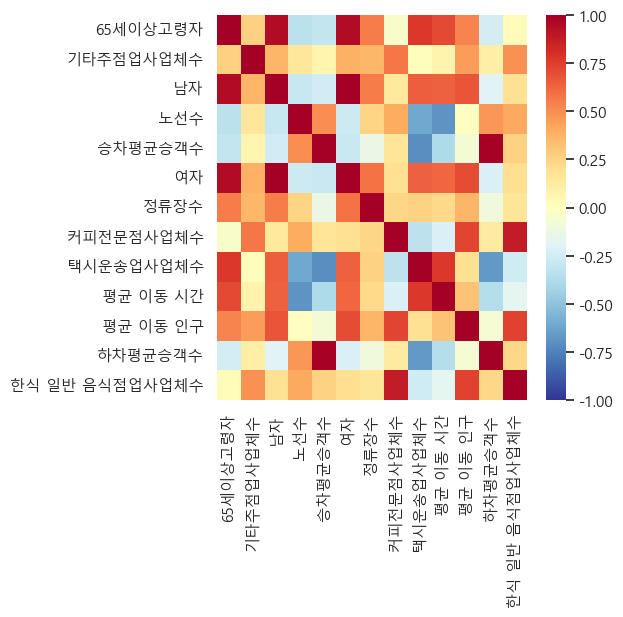

In [114]:
plt.figure(figsize = (5,5))
sns.heatmap(seoul_df2.corr(),
            
            fmt = '.3f',
            cmap = 'RdYlBu_r',
            vmin = -1, vmax = 1)
plt.show()

In [68]:
seoul_df2 = seoul_df[seoul_df.columns.difference(['기간','세대','총인구','한국인합','한국인남자','한국인여자','외국인합','외국인여자','외국인남자','세대당인구','승차총승객수','하차총승객수','총 이동 시간','총 이동 인구'])]
seoul_df2.head()

,65세이상고령자,기타주점업사업체수,남자,노선수,승차평균승객수,여자,자치구,정류장수,커피전문점사업체수,택시운송업사업체수,평균 이동 시간,평균 이동 인구,하차평균승객수,한식 일반 음식점업사업체수
0,28064,537,74018,114,131.889620,79666,종로구,349,948,215,21.443330,41.486279,125.534028,1548
1,24742,381,63869,110,121.020124,67581,중구,178,869,230,21.166269,41.724896,115.324511,1588
2,39461,487,114571,72,137.891694,121947,용산구,323,634,416,21.553622,34.636181,134.485421,857
3,46896,285,141662,60,96.377369,149947,성동구,435,547,1200,21.950757,39.869241,94.298888,956
4,52604,633,169525,44,118.352546,183585,광진구,269,590,1119,22.779081,43.671869,118.523137,963


In [56]:
pd.options.mode.chained_assignment = None

def scaling(df, scale_columns):
    for i in scale_columns:
        series_mean = df[i].mean()
        series_std = df[i].std()
        df[i] = df[i].apply(lambda x : (x - series_mean)/series_std)
    return df

In [57]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [58]:
seoul_df2.columns

Index(['65세이상고령자', '기타주점업사업체수', '남자', '노선수', '승차평균승객수', '여자', '자치구', '정류장수',
       '커피전문점사업체수', '택시운송업사업체수', '평균 이동 시간', '평균 이동 인구', '하차평균승객수',
       '한식 일반 음식점업사업체수'],
      dtype='object')

In [29]:
seoul_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   65세이상고령자        25 non-null     int64  
 1   기타주점업사업체수       25 non-null     int64  
 2   남자              25 non-null     int64  
 3   노선수             25 non-null     int64  
 4   승차평균승객수         25 non-null     float64
 5   여자              25 non-null     int64  
 6   자치구             25 non-null     object 
 7   정류장수            25 non-null     int64  
 8   커피전문점사업체수       25 non-null     int64  
 9   택시운송업사업체수       25 non-null     int64  
 10  평균 이동 시간        25 non-null     float64
 11  평균 이동 인구        25 non-null     float64
 12  하차평균승객수         25 non-null     float64
 13  한식 일반 음식점업사업체수  25 non-null     int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 2.9+ KB


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst      

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


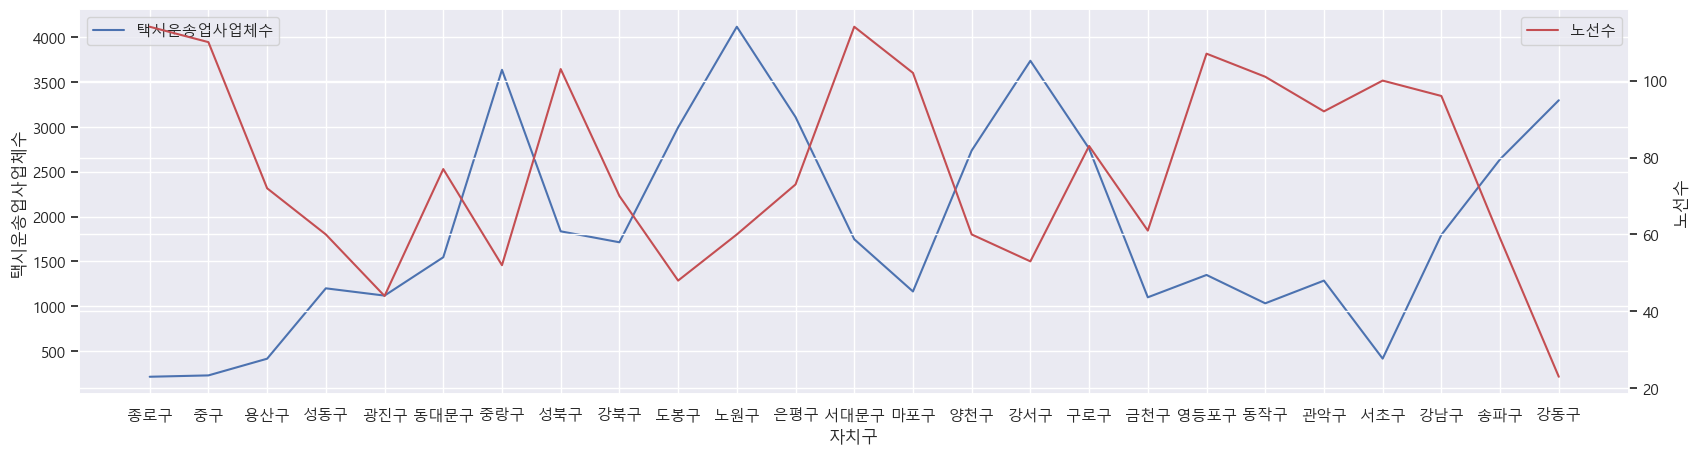

In [149]:
plt.figure(figsize = (20,5))
sns.lineplot(seoul_df['자치구'],seoul_df['택시운송업사업체수'],color = 'b', label = '택시운송업사업체수')
plt.legend(loc = 'upper left')
plt.twinx()

sns.lineplot(seoul_df['자치구'],seoul_df['노선수'],color = 'r', label = '노선수')
plt.show()

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


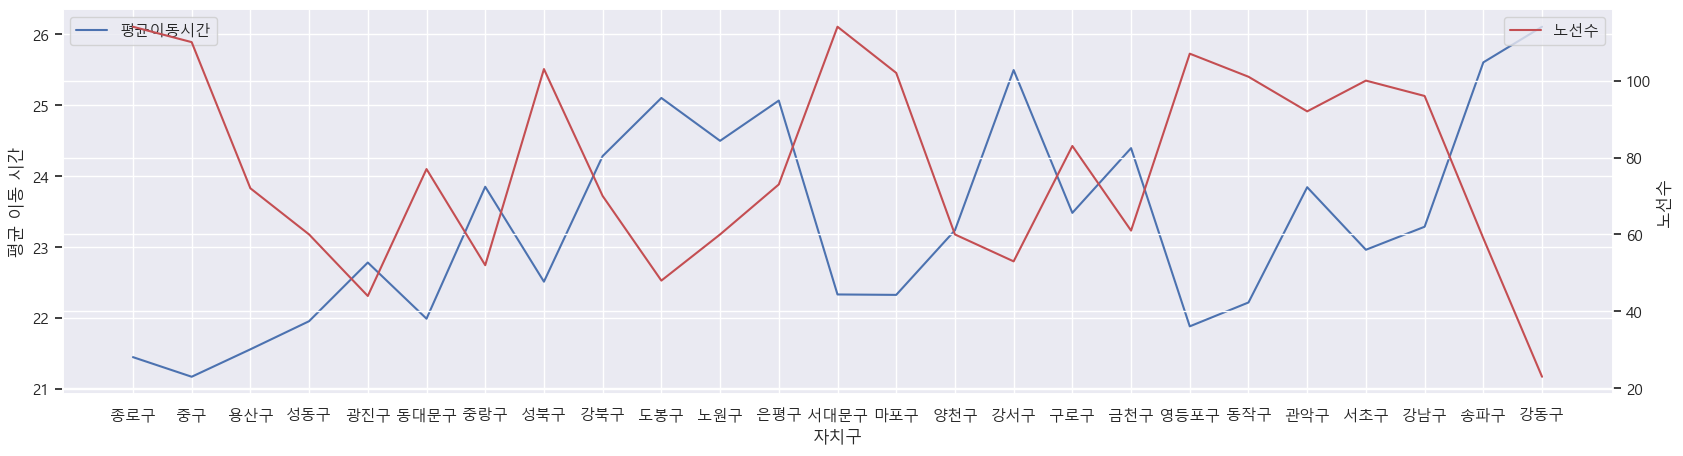

In [145]:
plt.figure(figsize = (20,5))
sns.lineplot(seoul_df['자치구'],seoul_df['평균 이동 시간'],color = 'b', label = '평균이동시간')
plt.twinx()

sns.lineplot(seoul_df['자치구'],seoul_df['노선수'],color = 'r', label = '노선수')

plt.show()

In [93]:
seoul_df2.head()

,65세이상고령자,기타주점업사업체수,남자,노선수,승차평균승객수,여자,자치구,정류장수,커피전문점사업체수,택시운송업사업체수,평균 이동 시간,평균 이동 인구,하차평균승객수,한식 일반 음식점업사업체수
0,28064,537,74018,114,131.889620,79666,종로구,349,948,215,21.443330,41.486279,125.534028,1548
1,24742,381,63869,110,121.020124,67581,중구,178,869,230,21.166269,41.724896,115.324511,1588
2,39461,487,114571,72,137.891694,121947,용산구,323,634,416,21.553622,34.636181,134.485421,857
3,46896,285,141662,60,96.377369,149947,성동구,435,547,1200,21.950757,39.869241,94.298888,956
4,52604,633,169525,44,118.352546,183585,광진구,269,590,1119,22.779081,43.671869,118.523137,963


### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


PearsonRResult(statistic=-0.6097254040327329, pvalue=0.0012129767650021761)


<AxesSubplot:xlabel='노선수', ylabel='택시운송업사업체수'>

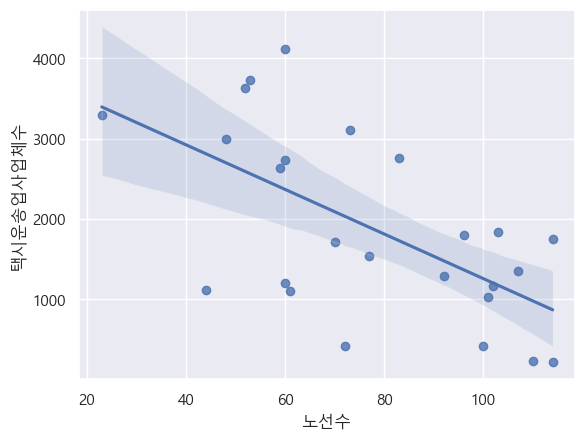

In [109]:
print(spst.pearsonr(seoul_df['노선수'], seoul_df['택시운송업사업체수']))
sns.regplot(x = '노선수', y = '택시운송업사업체수', data = seoul_df)

PearsonRResult(statistic=-0.691924593126538, pvalue=0.00012732755956498096)


<AxesSubplot:xlabel='노선수', ylabel='평균 이동 시간'>

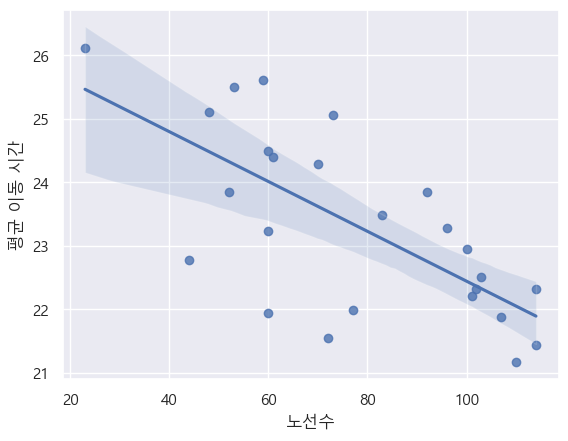

In [115]:
print(spst.pearsonr(seoul_df['노선수'], seoul_df['평균 이동 시간']))
sns.regplot(x = '노선수', y = '평균 이동 시간', data = seoul_df)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='자치구', ylabel='택시운송업사업체수'>

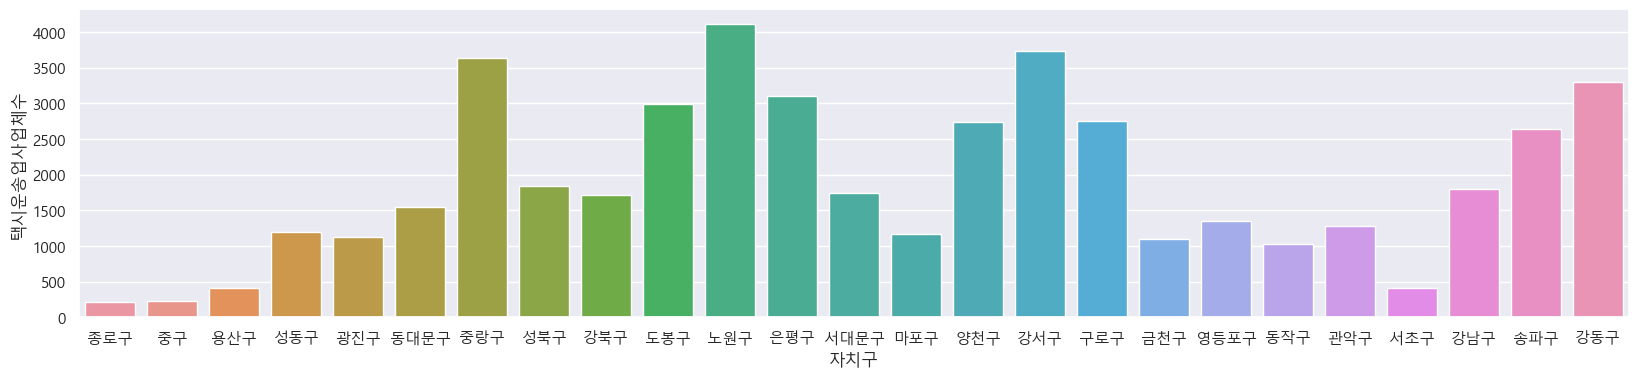

In [116]:
plt.figure(figsize = (20,4))
sns.barplot('자치구', '택시운송업사업체수', data = seoul_df2)

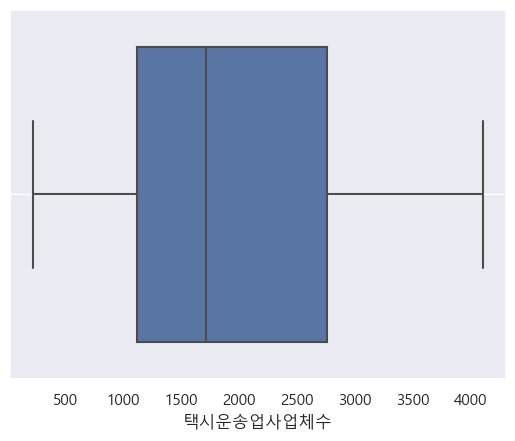

In [117]:
sns.boxplot(x = seoul_df2['택시운송업사업체수'])
plt.grid()
plt.show()

In [72]:
target = '노선수'

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(seoul_bus_station.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?